In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd

In [2]:
bl = cv2.imread('Builtland_segmented.png', 0)/255*1
cl = cv2.imread('Cropland_segmented.png', 0)/255*1
gl = cv2.imread('Grassland_segmented.png', 0)/255*1
ml = cv2.imread('Mangrooveland_segmented.png', 0)/255*1
fl = cv2.imread('Forestland_segmented.png', 0)/255*1

In [3]:
elev = cv2.imread('elevation.png', 0)

In [4]:
elev.max(), elev.min()

(255, 0)

In [5]:
elev = (elev/255)*733

In [6]:
elev.max(), elev.min()

(733.0, 0.0)

In [7]:
elev.shape, bl.shape, cl.shape, gl.shape, ml.shape, fl.shape

((11100, 2600),
 (11100, 2600),
 (11100, 2600),
 (11100, 2600),
 (11100, 2600),
 (11100, 2600))

In [8]:
elev_flatten = elev.flatten()
bl_flatten = bl.flatten()
cl_flatten = cl.flatten()
gl_flatten = gl.flatten()
ml_flatten = ml.flatten()
fl_flatten = fl.flatten()


In [9]:
type(elev_flatten), type(bl_flatten), type(cl_flatten), type(gl_flatten), type(ml_flatten), type(fl_flatten)

(numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray,
 numpy.ndarray)

In [10]:
typedf = pd.DataFrame({'elevation':elev_flatten, 'builtland':bl_flatten, 'cropland':cl_flatten, 'grassland':gl_flatten, 'mangroove':ml_flatten, 'forest':fl_flatten})

In [11]:
typedf

,elevation,builtland,cropland,grassland,mangroove,forest
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
28859995,0.0,0.0,0.0,0.0,0.0,0.0
28859996,0.0,0.0,0.0,0.0,0.0,0.0
28859997,0.0,0.0,0.0,0.0,0.0,0.0
28859998,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
bl_init = typedf['builtland'].sum()
cl_init = typedf['cropland'].sum()
gl_init = typedf['grassland'].sum()
ml_init = typedf['mangroove'].sum()
fl_init = typedf['forest'].sum()

bl_init, cl_init, gl_init, ml_init, fl_init

(450594.0, 1086318.0, 1107952.0, 229102.0, 2974074.0)

In [13]:
typedf['elevation'].sum(), typedf['elevation'].mean(), typedf['elevation'].max(), typedf['elevation'].min()

(1077472217.4431384, 37.33444966885441, 733.0, 0.0)

In [14]:
typedf10 = typedf
typedf10['elevation'] = typedf10['elevation']-7
typedf10[typedf10['elevation']<0] = 0


In [15]:
typedf10

,elevation,builtland,cropland,grassland,mangroove,forest
0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
28859995,0.0,0.0,0.0,0.0,0.0,0.0
28859996,0.0,0.0,0.0,0.0,0.0,0.0
28859997,0.0,0.0,0.0,0.0,0.0,0.0
28859998,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
typedf10['elevation'].sum(), typedf10['elevation'].mean(), typedf10['elevation'].max(), typedf10['elevation'].min()

(1034692208.7999977, 35.852120887040805, 726.0, 0.0)

In [17]:
# typedf10[typedf10['elevation']==0]['bulitland']= 0

typedf10.loc[typedf10['elevation']==0, 'builtland'] = 0
typedf10.loc[typedf10['elevation']==0, 'cropland'] = 0
typedf10.loc[typedf10['elevation']==0, 'grassland'] = 0
typedf10.loc[typedf10['elevation']==0, 'mangroove'] = 0
typedf10.loc[typedf10['elevation']==0, 'forest'] = 0


In [18]:
sum(typedf10['builtland']), sum(typedf10['cropland']), sum(typedf10['grassland']), sum(typedf10['mangroove']), sum(typedf10['forest'])

(297715.0, 329620.0, 1090027.0, 155865.0, 2885577.0)

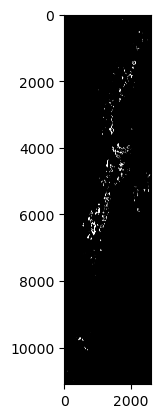

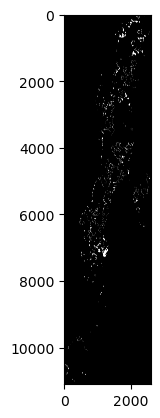

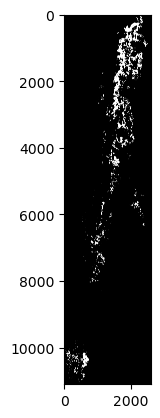

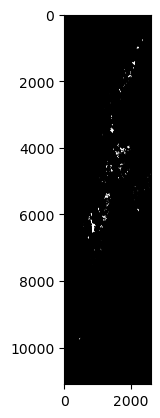

In [19]:
bl10 = np.array(typedf10['builtland']).reshape((11100, 2600))
cl10 = np.array(typedf10['cropland']).reshape((11100, 2600))
gl10 = np.array(typedf10['grassland']).reshape((11100, 2600))
ml10 = np.array(typedf10['mangroove']).reshape((11100, 2600))
fl10 = np.array(typedf10['forest']).reshape((11100, 2600))

plt.imshow(bl10, cmap='gray')
plt.show()
plt.imshow(cl10, cmap='gray')
plt.show()
plt.imshow(gl10, cmap='gray')
plt.show()
plt.imshow(ml10, cmap='gray')
plt.show()



In [20]:
def givereport(sealevel, year, ipcc):
    typedf10 = typedf
    typedf10['elevation'] = typedf10['elevation']-sealevel
    typedf10[typedf10['elevation']<0] = 0
    # print(typedf10['elevation'].sum(), typedf10['elevation'].mean(), typedf10['elevation'].max(), typedf10['elevation'].min())
    typedf10.loc[typedf10['elevation']==0, 'builtland'] = 0
    typedf10.loc[typedf10['elevation']==0, 'cropland'] = 0
    typedf10.loc[typedf10['elevation']==0, 'grassland'] = 0
    typedf10.loc[typedf10['elevation']==0, 'mangroove'] = 0
    typedf10.loc[typedf10['elevation']==0, 'forest'] = 0
    bl_loss = (bl_init-sum(typedf10['builtland']))/bl_init*100
    cl_loss = (cl_init-sum(typedf10['cropland']))/cl_init*100
    gl_loss = (gl_init-sum(typedf10['grassland']))/gl_init*100
    ml_loss = (ml_init-sum(typedf10['mangroove']))/ml_init*100
    fl_loss = (fl_init-sum(typedf10['forest']))/fl_init*100

    retarr = [bl_loss, cl_loss, gl_loss, ml_loss, fl_loss]    

    bl10 = np.array(typedf10['builtland']).reshape((11100, 2600))
    cl10 = np.array(typedf10['cropland']).reshape((11100, 2600))
    gl10 = np.array(typedf10['grassland']).reshape((11100, 2600))
    ml10 = np.array(typedf10['mangroove']).reshape((11100, 2600))
    fl10 = np.array(typedf10['forest']).reshape((11100, 2600))
    ele10 = np.array(typedf10['elevation']).reshape((11100, 2600))
    plt.imshow(bl10, cmap='gray')
    plt.title("The Remaining Built Land after the sea level rise of "+str(sealevel)+" meters")
    plt.show()
    cv2.imwrite("Builtland_segmented_"+str(year)+"_"+str(ipcc)+".png", bl10*255)
    plt.title("The Remaining Crop Land after the sea level rise of "+str(sealevel)+" meters")
    plt.imshow(cl10, cmap='gray')
    plt.show()
    cv2.imwrite("Cropland_segmented_"+str(year)+"_"+str(ipcc)+".png", cl10*255)
    plt.title("The Remaining Grass Land after the sea level rise of "+str(sealevel)+" meters")
    plt.imshow(gl10, cmap='gray')
    plt.show()
    cv2.imwrite("Grassland_segmented_"+str(year)+"_"+str(ipcc)+".png", gl10*255)
    plt.title("The Remaining Mangroove Land after the sea level rise of "+str(sealevel)+" meters")
    plt.imshow(ml10, cmap='gray')
    plt.show()
    cv2.imwrite("Mangrooveland_segmented_"+str(year)+"_"+str(ipcc)+".png", ml10*255)
    plt.title("The Remaining Forest Land after the sea level rise of "+str(sealevel)+" meters")
    plt.imshow(fl10, cmap='gray')
    plt.show()
    cv2.imwrite("Forestland_segmented_"+str(year)+"_"+str(ipcc)+".png", fl10*255)
    print(retarr)
    cv2.imwrite("Elevation_"+str(year)+"_"+str(ipcc)+".png", ele10/733*255) 
    return retarr


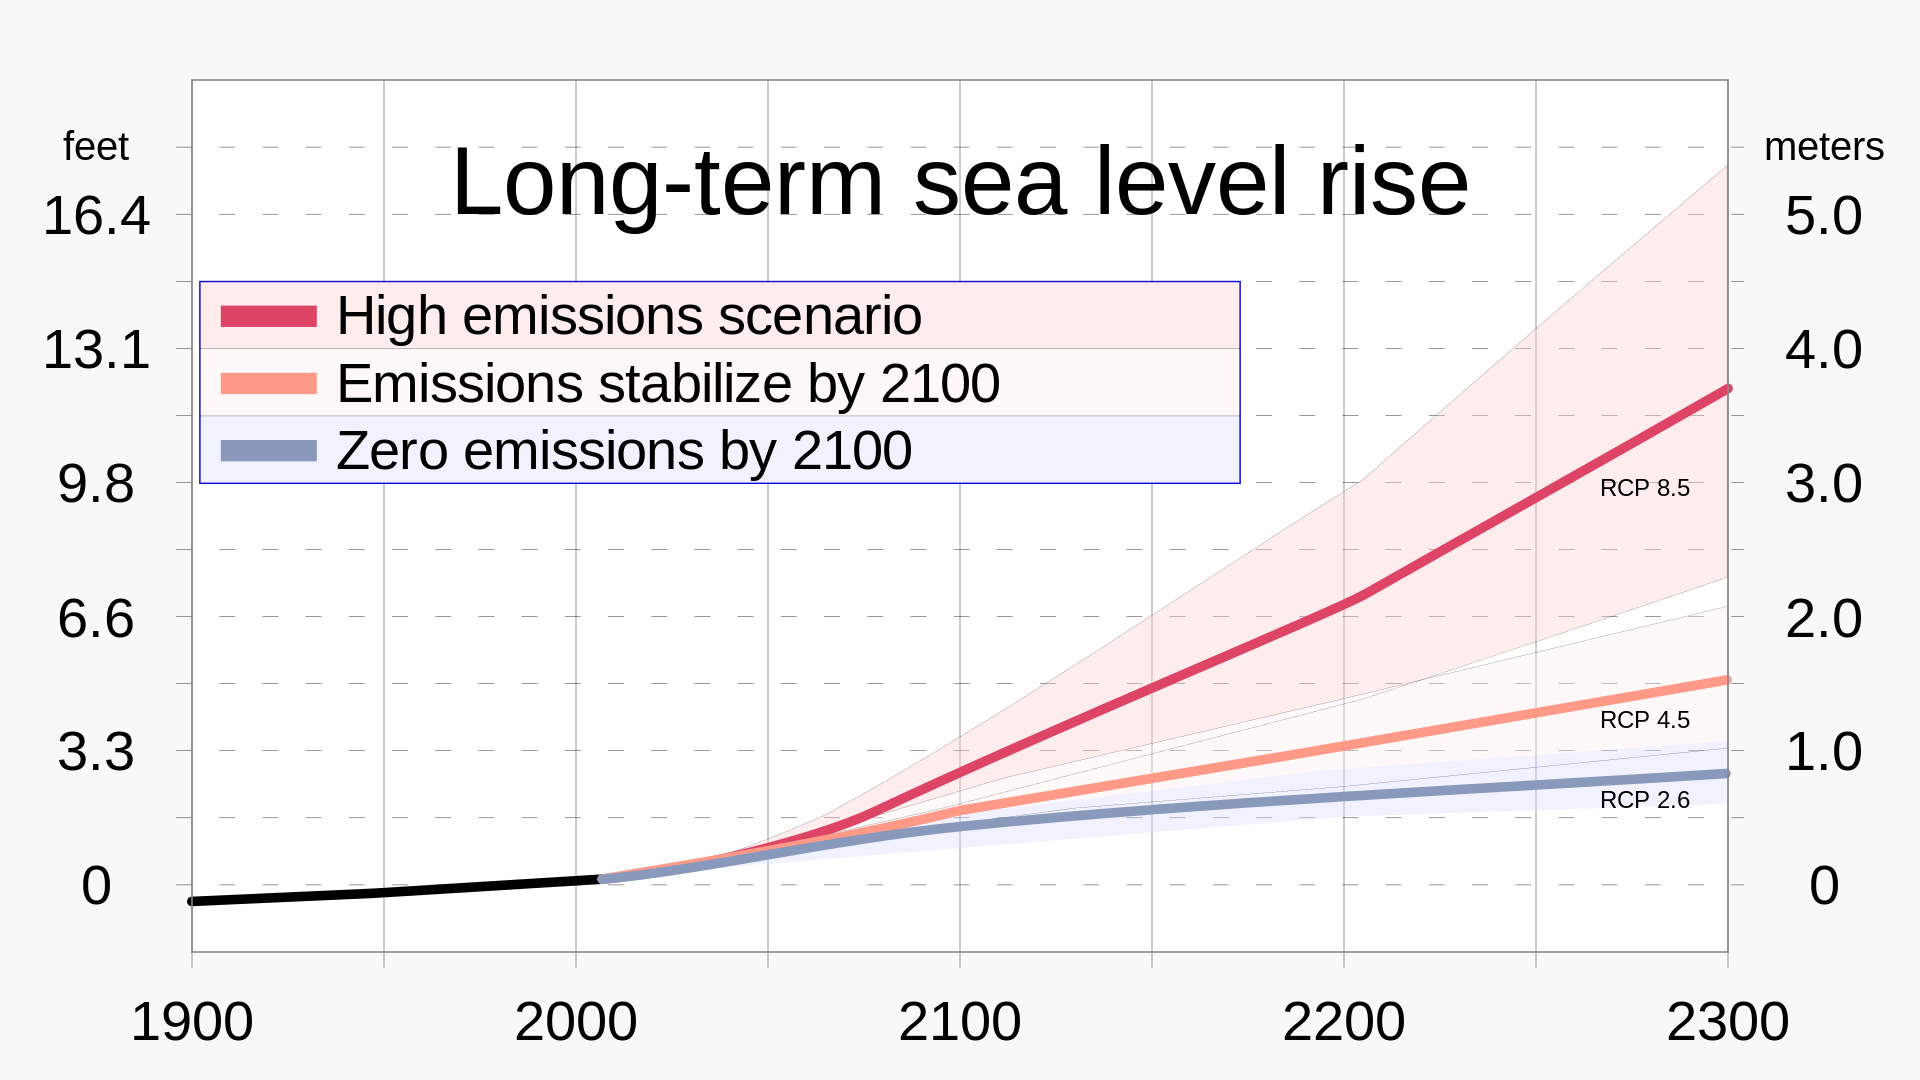

RCP 2.6

The Sea Level Rise of 0.25 meters in the Year 2050 will result in the following losses:


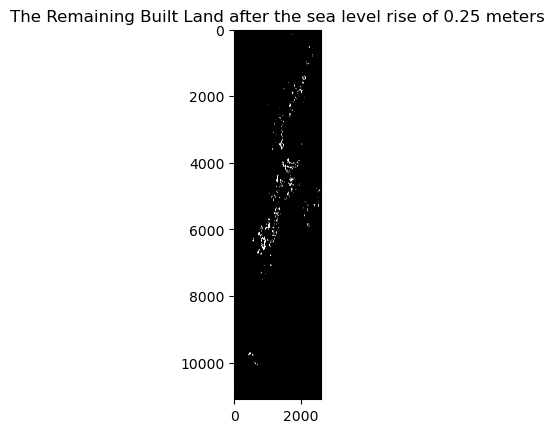

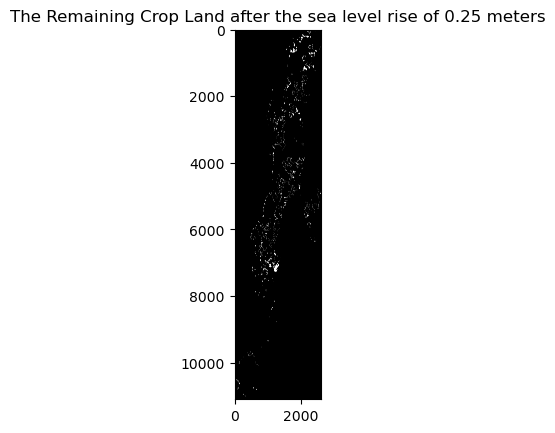

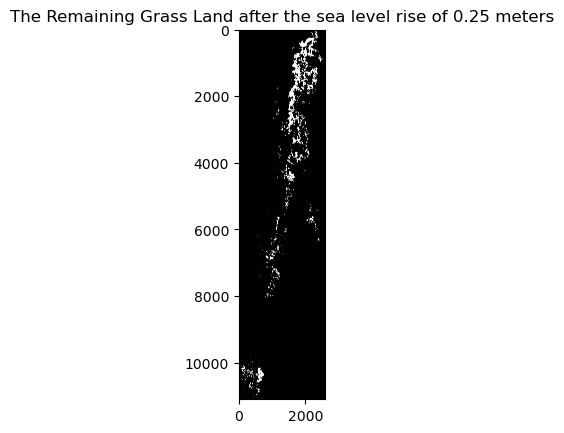

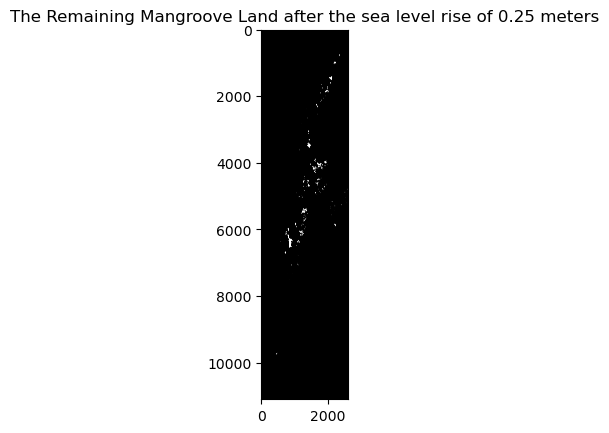

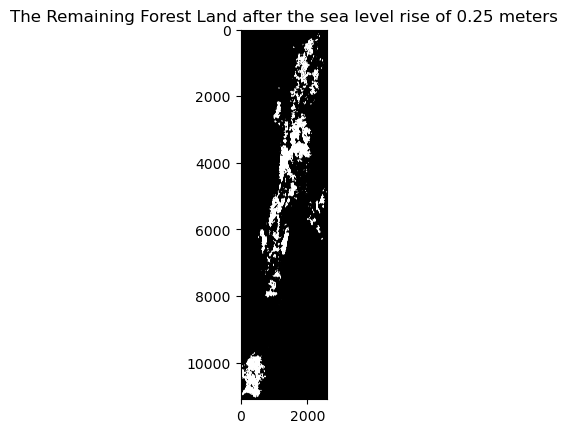

[33.92832572115918, 69.6571353876121, 1.6178498707525235, 31.966984138069503, 2.9756152671386116]
The Sea Level Rise of 0.45 meters in the Year 2100 will result in the following losses:


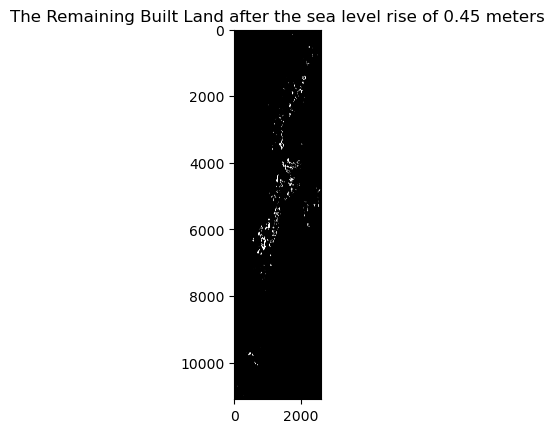

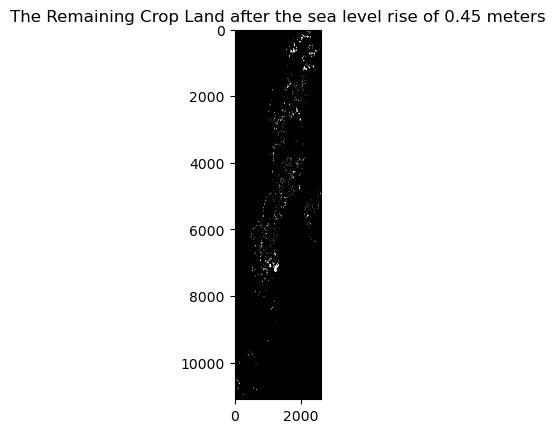

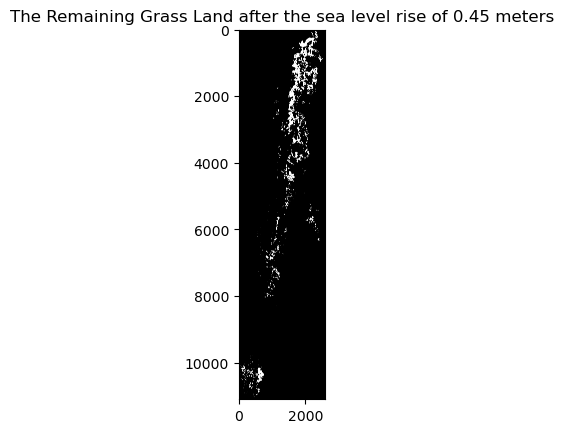

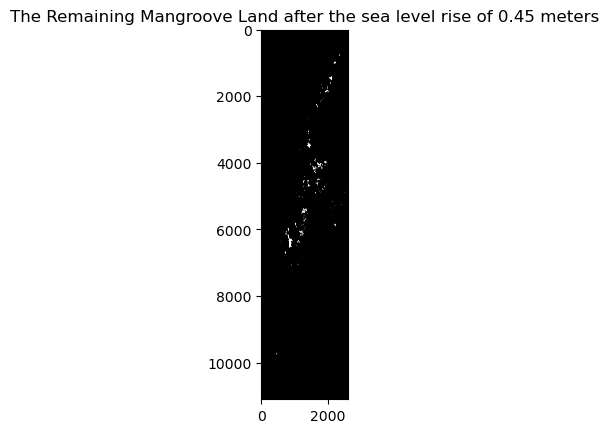

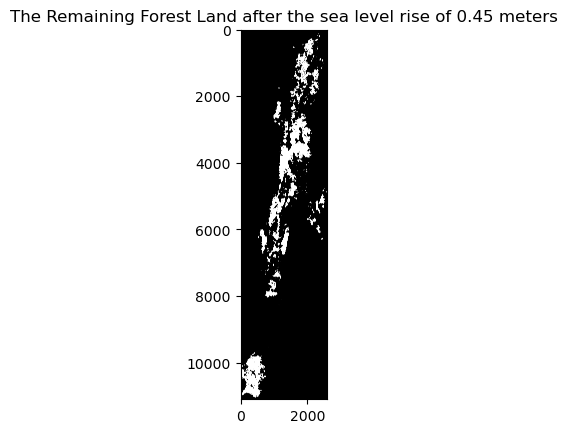

[33.92832572115918, 69.6571353876121, 1.6178498707525235, 31.966984138069503, 2.9756152671386116]
The Sea Level Rise of 0.55 meters in the Year 2150 will result in the following losses:


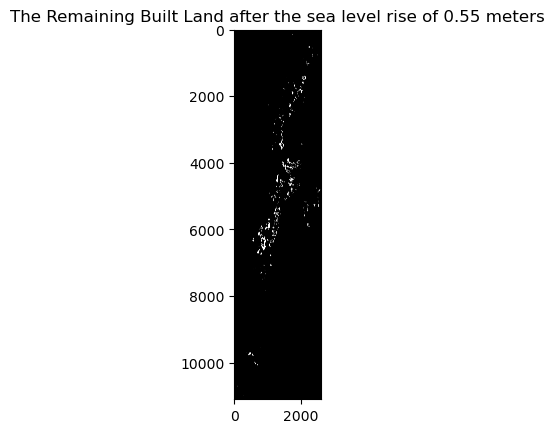

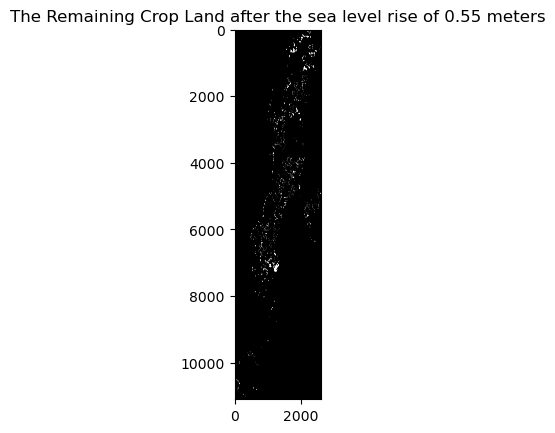

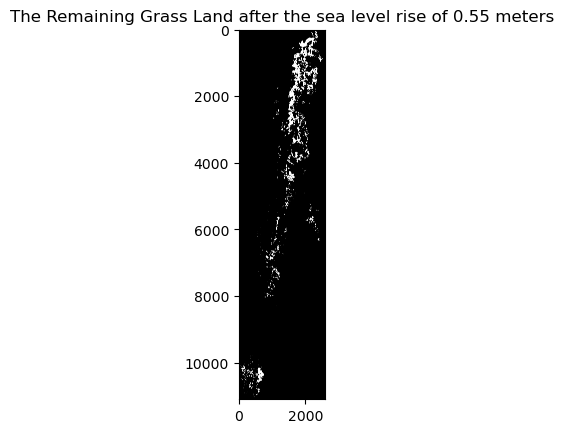

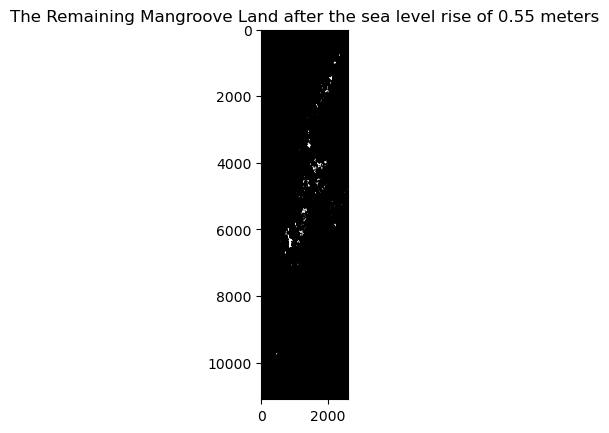

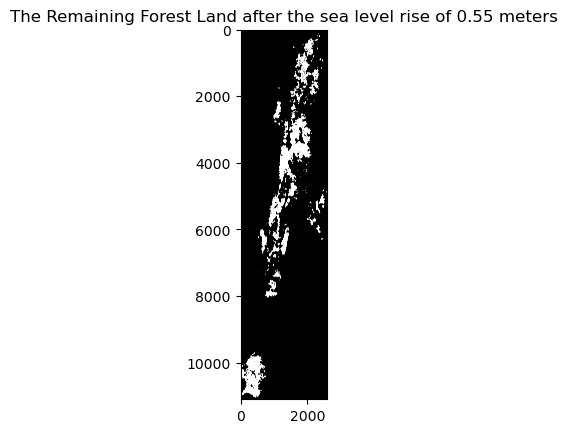

[33.92832572115918, 69.6571353876121, 1.6178498707525235, 31.966984138069503, 2.9756152671386116]
The Sea Level Rise of 0.65 meters in the Year 2200 will result in the following losses:


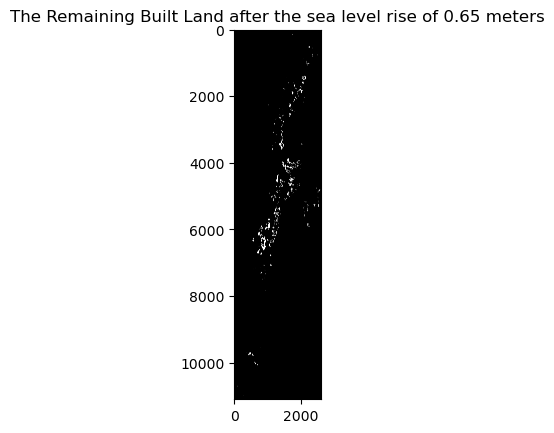

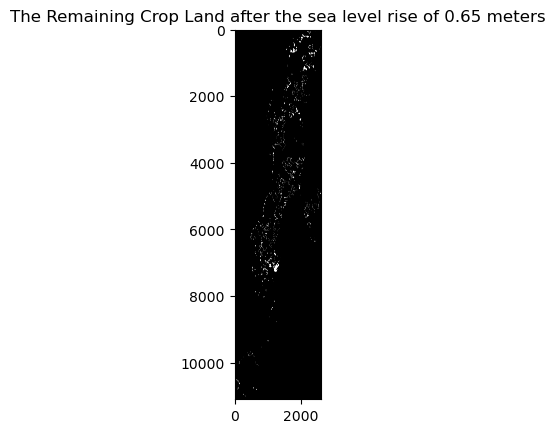

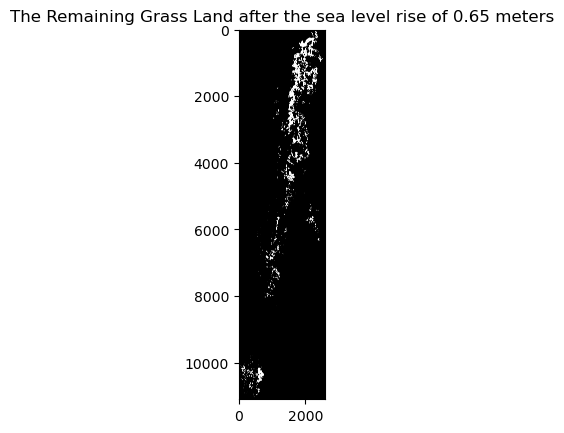

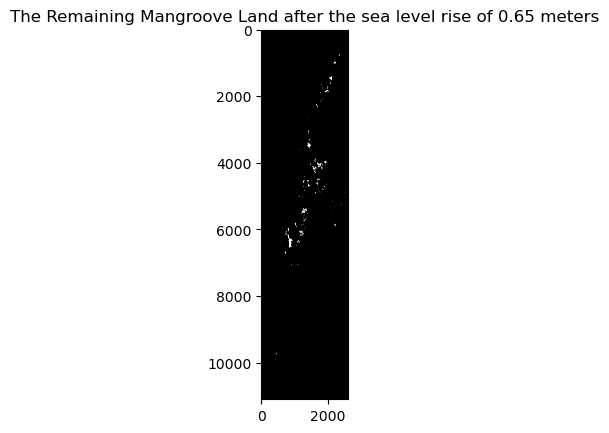

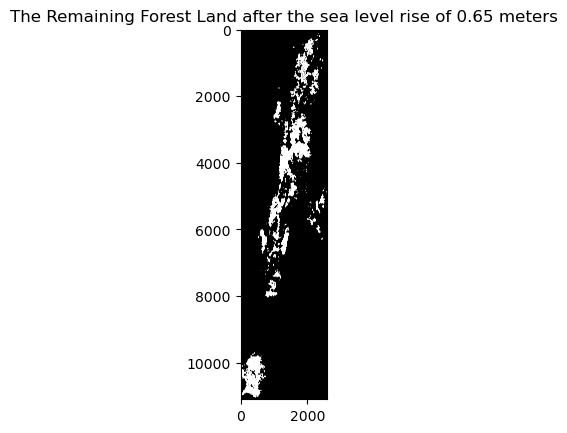

[35.01111865670648, 70.25797234327334, 2.018047713258336, 32.81726043421707, 3.0326414204892007]
The Sea Level Rise of 0.75 meters in the Year 2250 will result in the following losses:


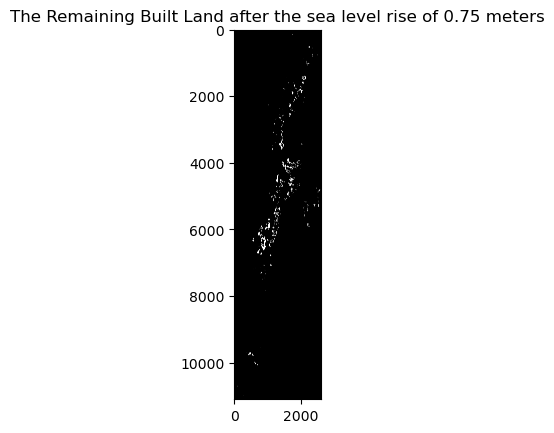

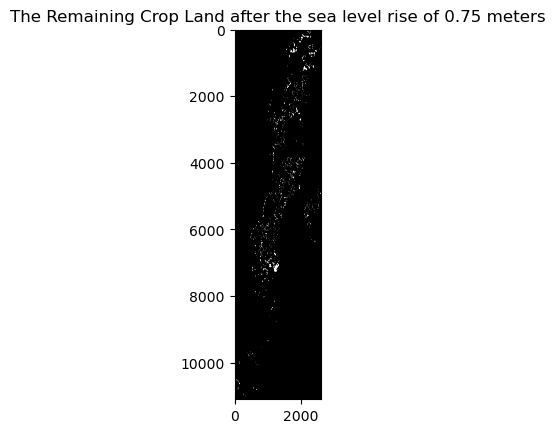

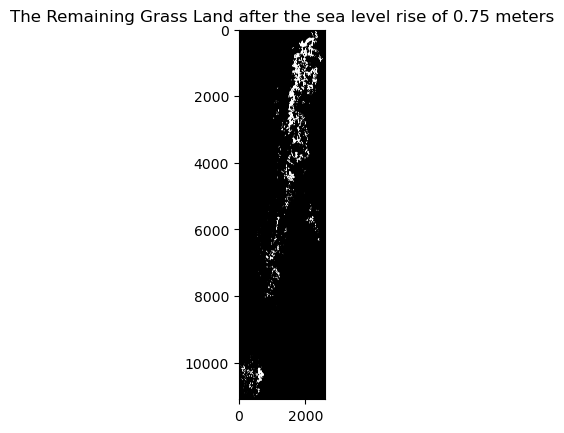

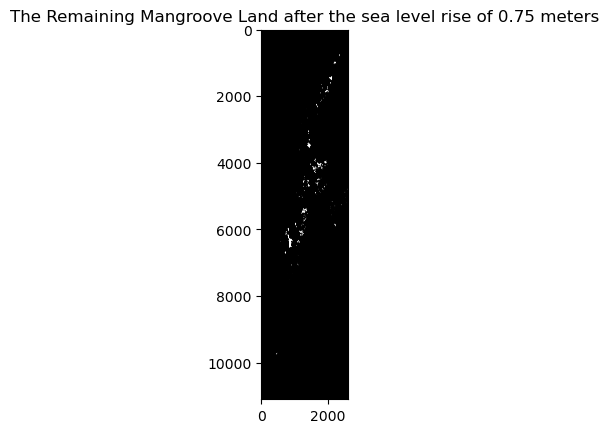

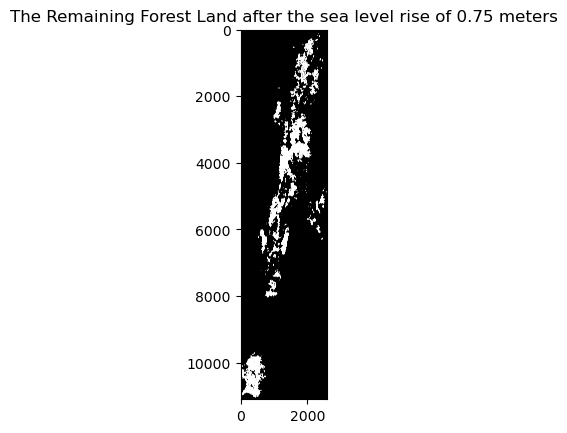

[35.01111865670648, 70.25797234327334, 2.018047713258336, 32.81726043421707, 3.0326414204892007]
The Sea Level Rise of 0.85 meters in the Year 2300 will result in the following losses:


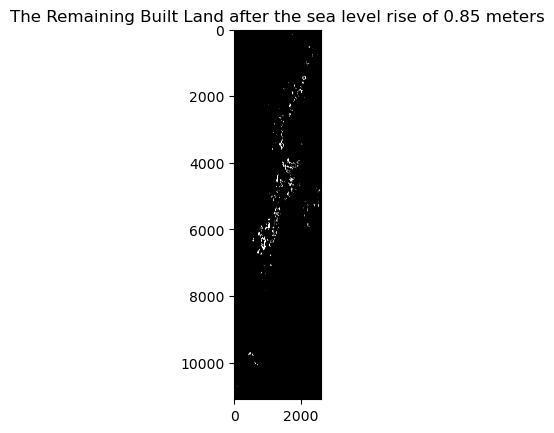

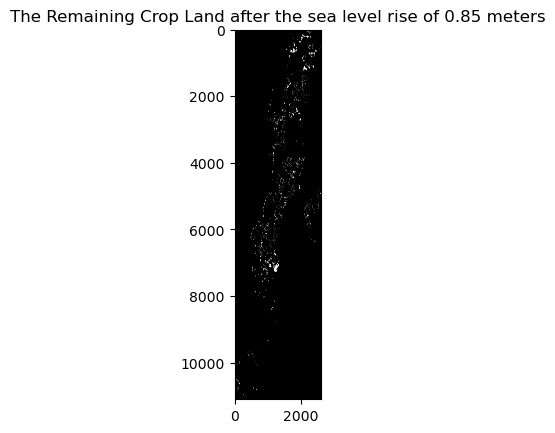

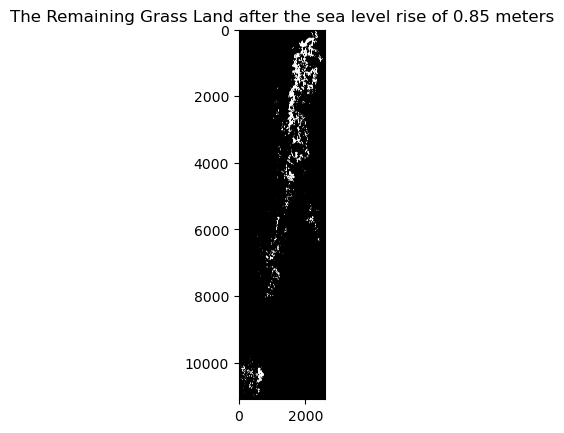

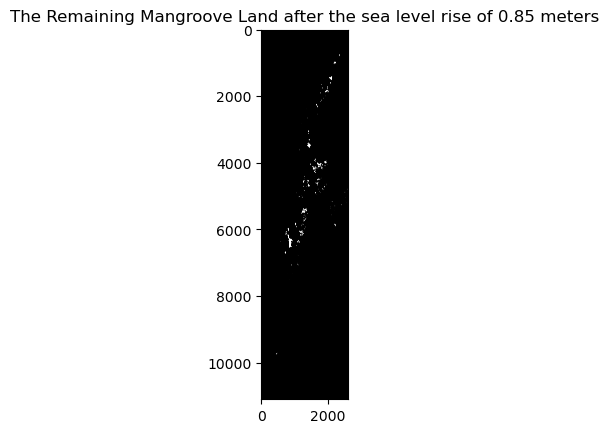

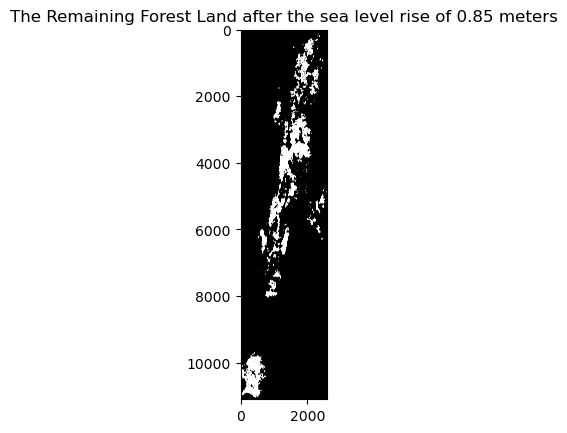

[35.01111865670648, 70.25797234327334, 2.018047713258336, 32.81726043421707, 3.0326414204892007]


In [21]:
RCP26levelsdict = {2050:0.25, 2100:0.45, 2150:0.55, 2200:0.65, 2250:0.75, 2300:0.85}
RCP26dict = {}

for key in RCP26levelsdict:
    print("The Sea Level Rise of "+str(RCP26levelsdict[key])+" meters", "in the Year", str(key), "will result in the following losses:")
    retarr = givereport(RCP26levelsdict[key], key, 'RCP26')
    RCP26dict[key] = retarr



In [22]:
# Write to file RCP26dict
with open('RCP26dict.txt', 'w') as f:
    print(RCP26dict, file=f)

The Sea Level Rise of 0.3 meters in the Year 2050 will result in the following losses:


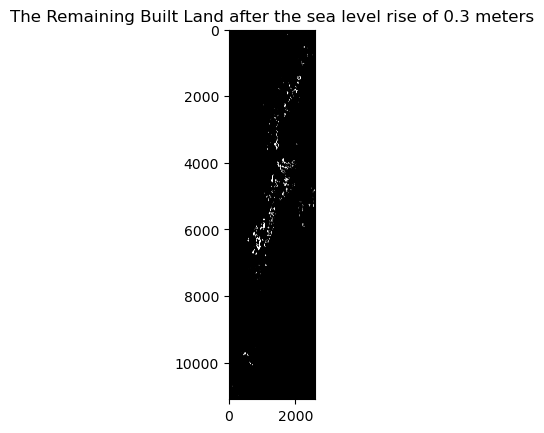

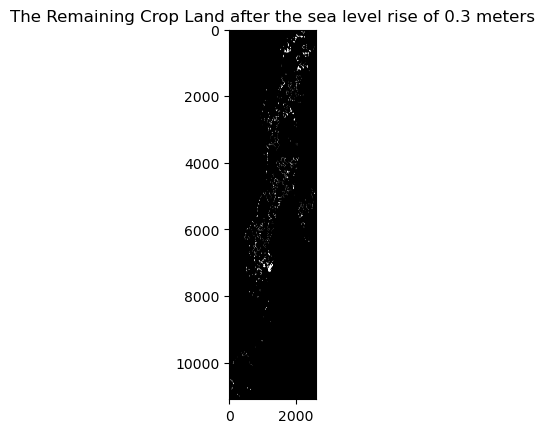

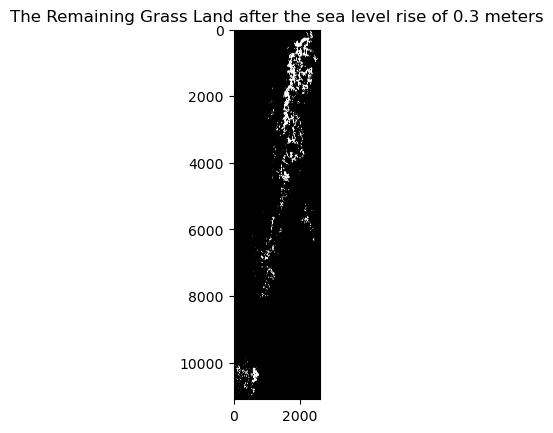

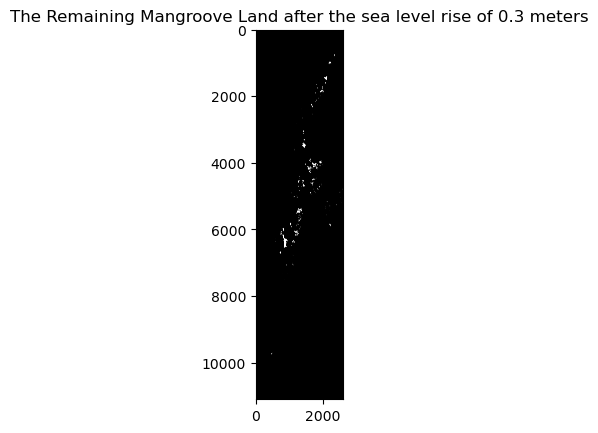

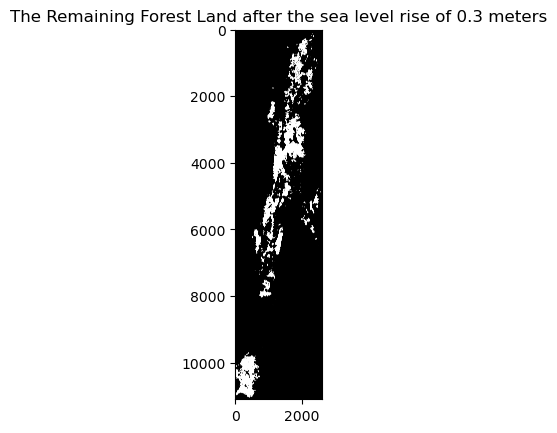

[35.01111865670648, 70.25797234327334, 2.018047713258336, 32.81726043421707, 3.0326414204892007]
The Sea Level Rise of 0.55 meters in the Year 2100 will result in the following losses:


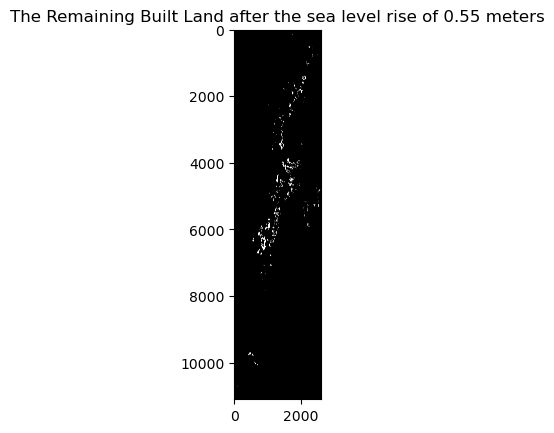

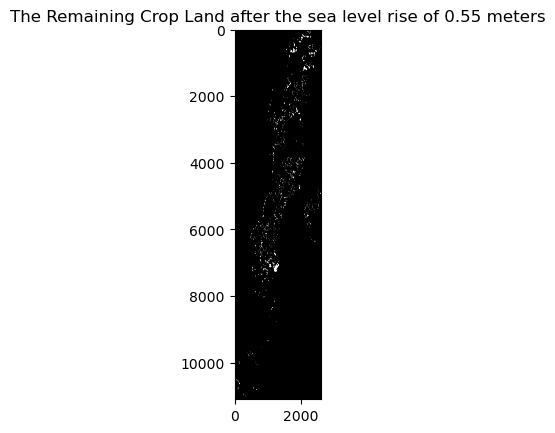

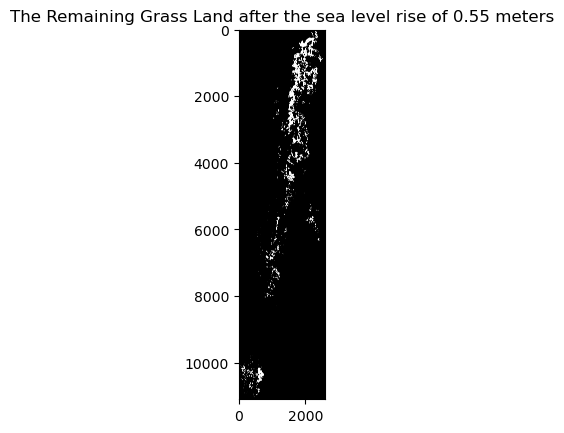

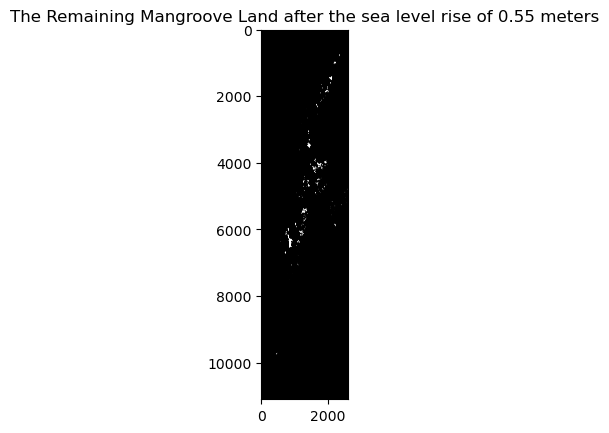

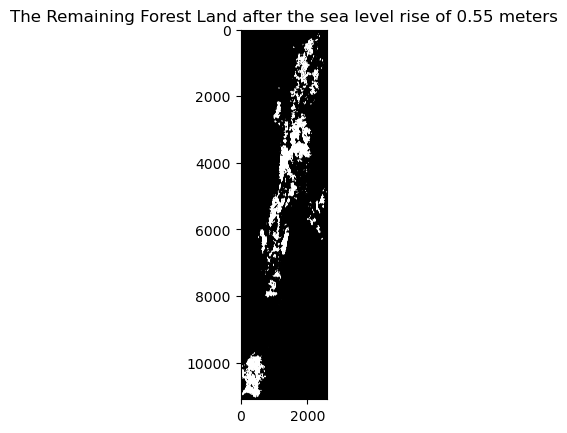

[35.01111865670648, 70.25797234327334, 2.018047713258336, 32.81726043421707, 3.0326414204892007]
The Sea Level Rise of 0.75 meters in the Year 2150 will result in the following losses:


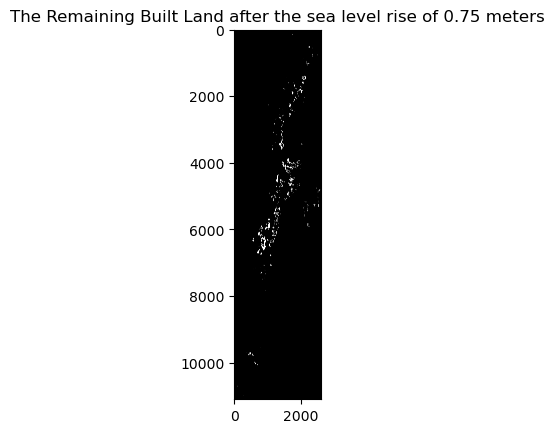

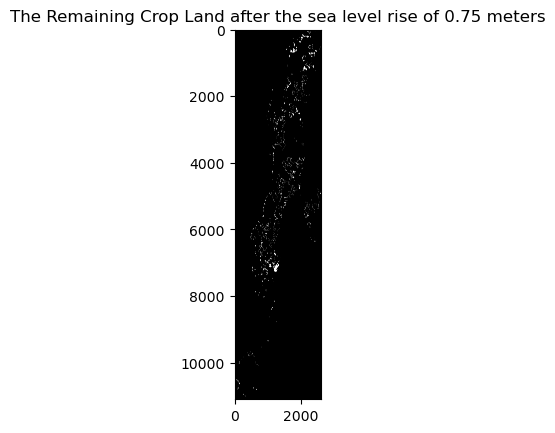

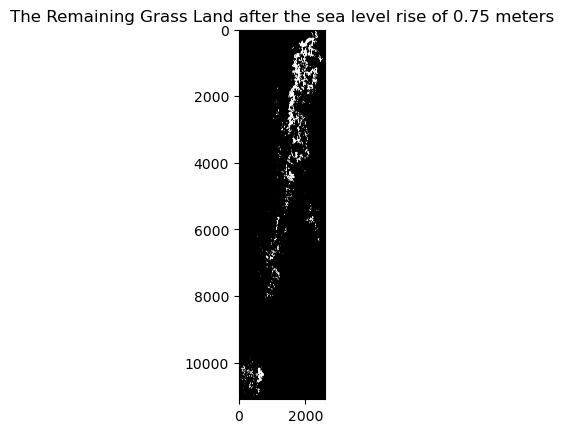

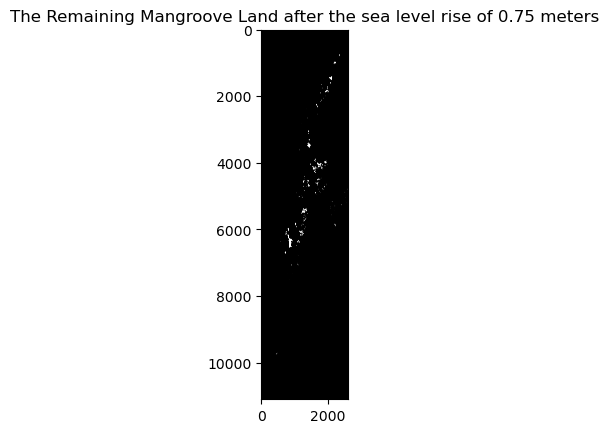

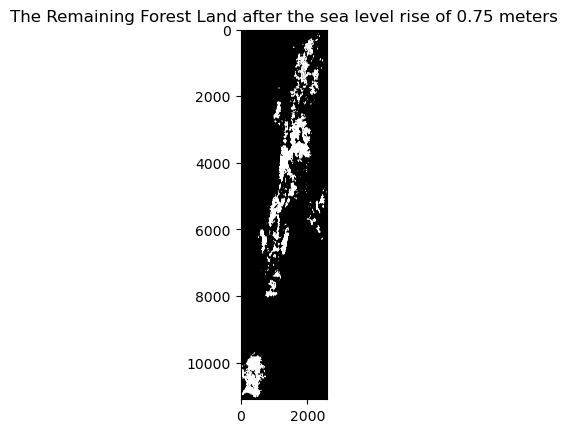

[36.60346120898192, 71.06685151125177, 2.6372983667162475, 34.19437630400433, 3.1245019458157395]
The Sea Level Rise of 1 meters in the Year 2200 will result in the following losses:


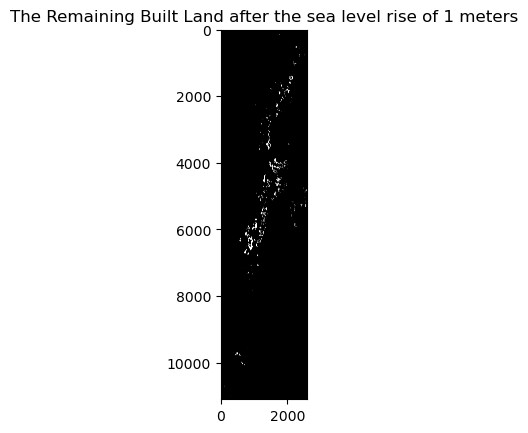

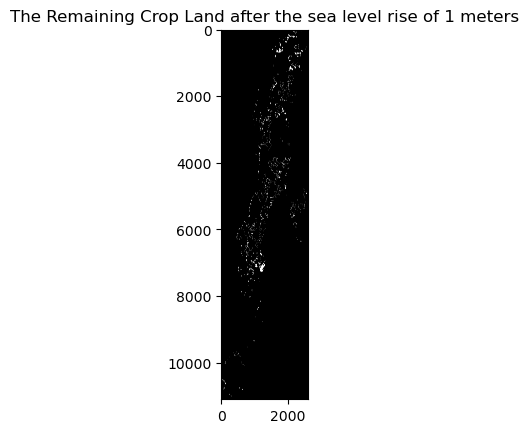

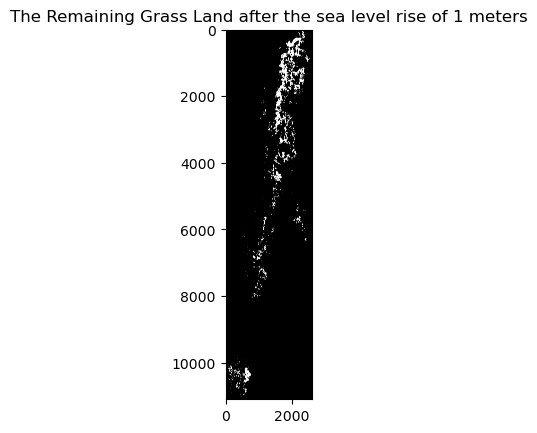

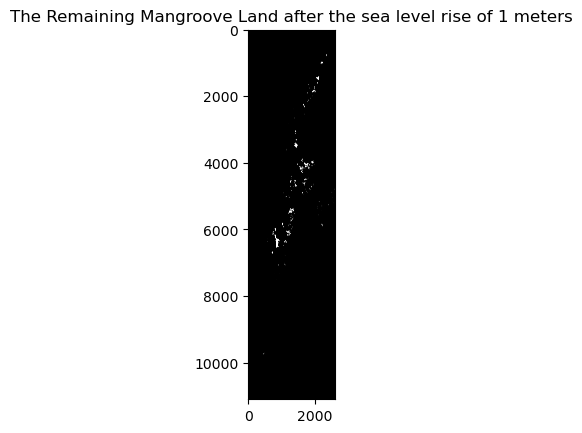

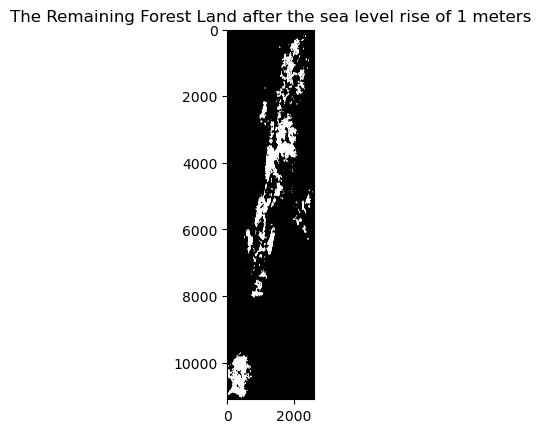

[36.60346120898192, 71.06685151125177, 2.6372983667162475, 34.19437630400433, 3.1245019458157395]
The Sea Level Rise of 1.3 meters in the Year 2250 will result in the following losses:


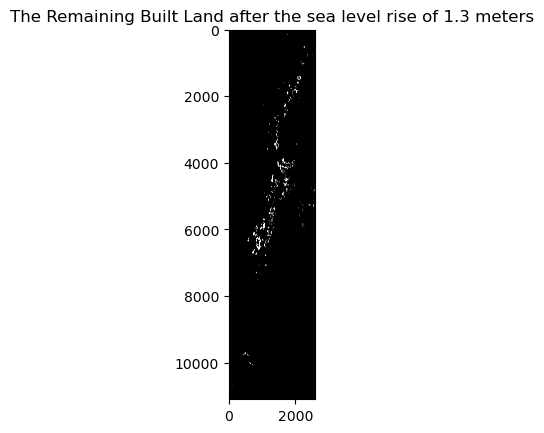

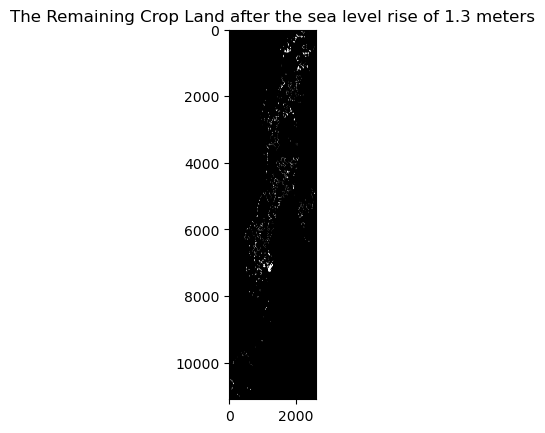

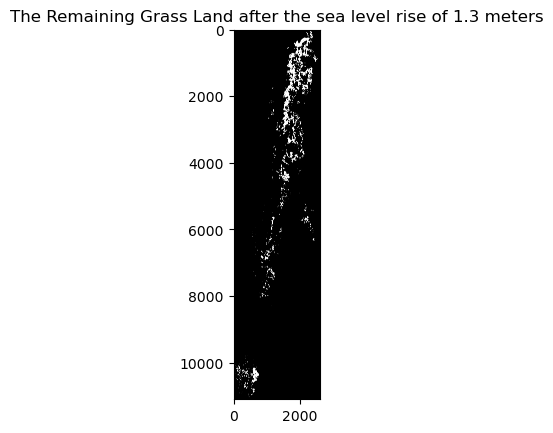

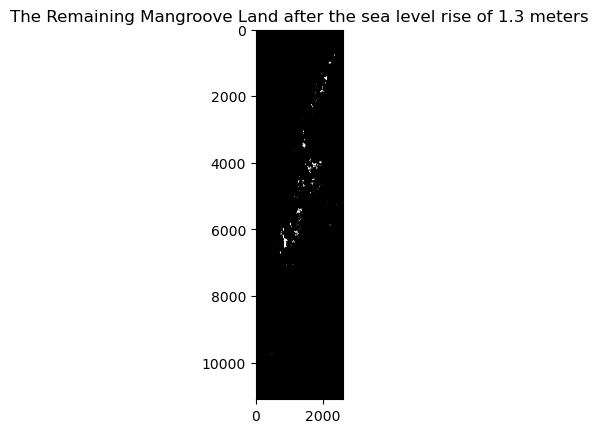

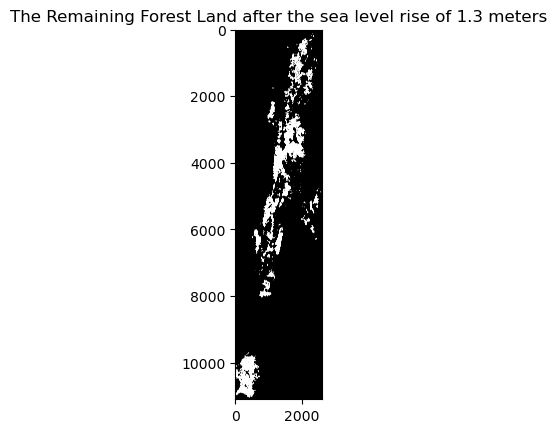

[38.63477986835156, 72.04023131348279, 3.43417404364088, 35.892309975469445, 3.251062347473533]
The Sea Level Rise of 1.5 meters in the Year 2300 will result in the following losses:


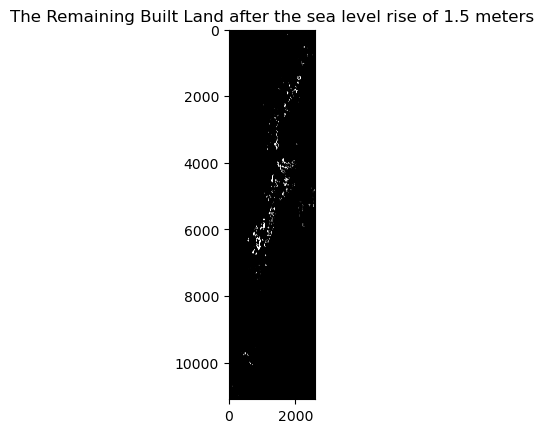

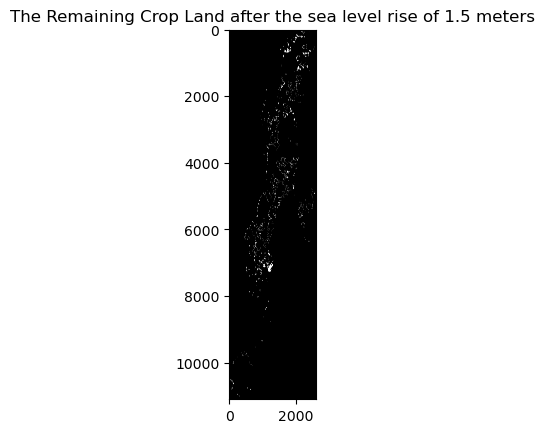

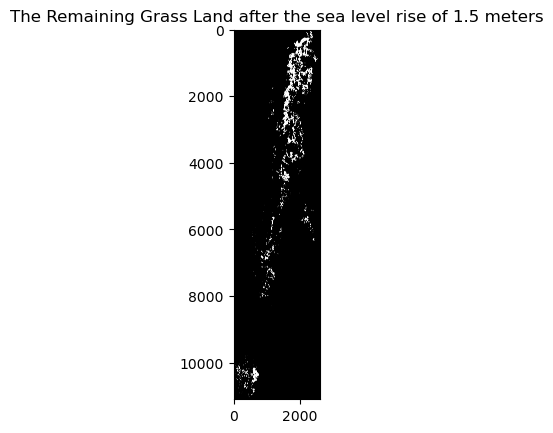

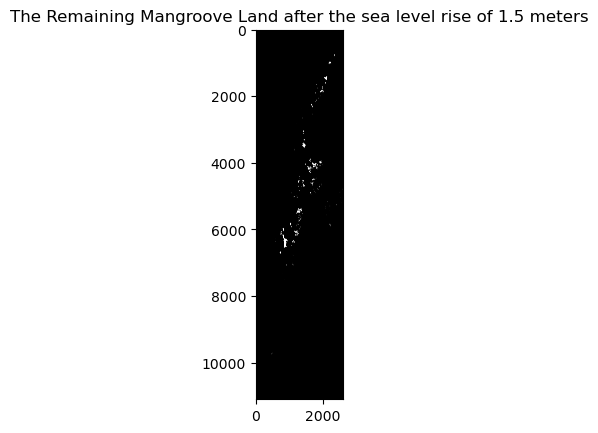

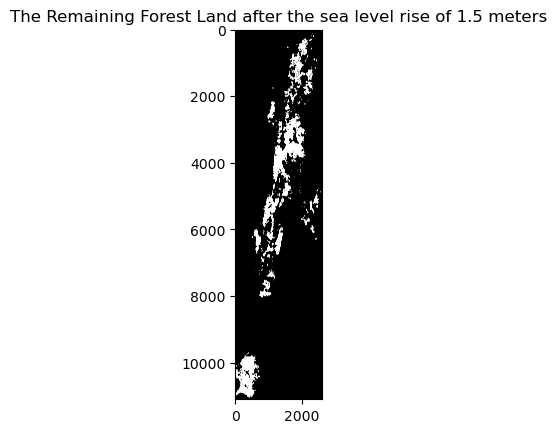

[38.63477986835156, 72.04023131348279, 3.43417404364088, 35.892309975469445, 3.251062347473533]


In [23]:
RCP45levelsdict = {2050:0.30, 2100:0.55, 2150:0.75, 2200:1, 2250:1.3, 2300:1.5}
RCP45dict = {}

for key in RCP45levelsdict:
    print("The Sea Level Rise of "+str(RCP45levelsdict[key])+" meters", "in the Year", str(key), "will result in the following losses:")
    retarr = givereport(RCP45levelsdict[key], key, 'RCP45')
    RCP45dict[key] = retarr

In [24]:
# Write to file RCP45dict

with open('RCP45dict.txt', 'w') as f:
    print(RCP45dict, file=f)

The Sea Level Rise of 0.45 meters in the Year 2050 will result in the following losses:


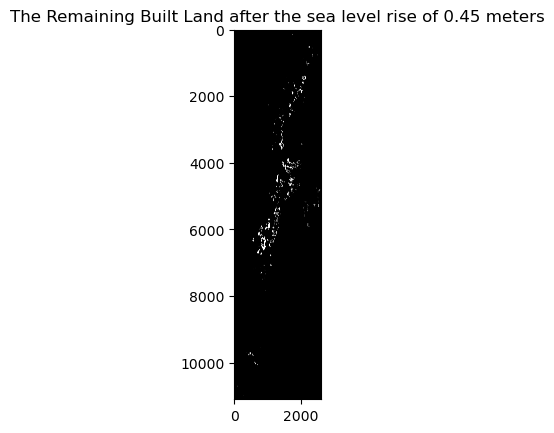

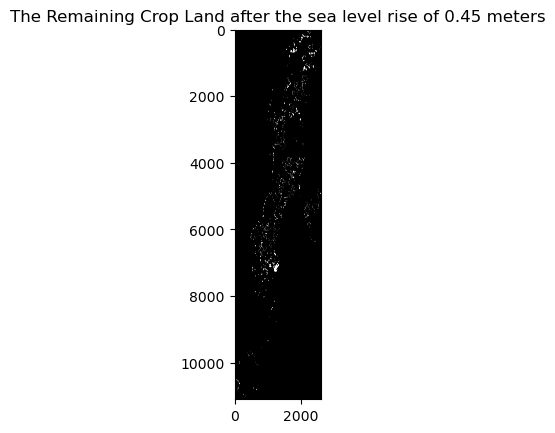

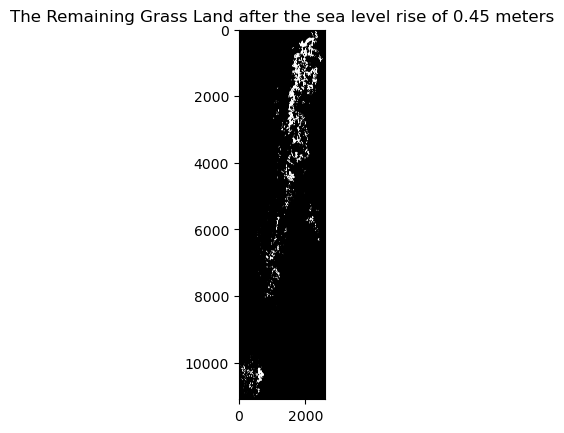

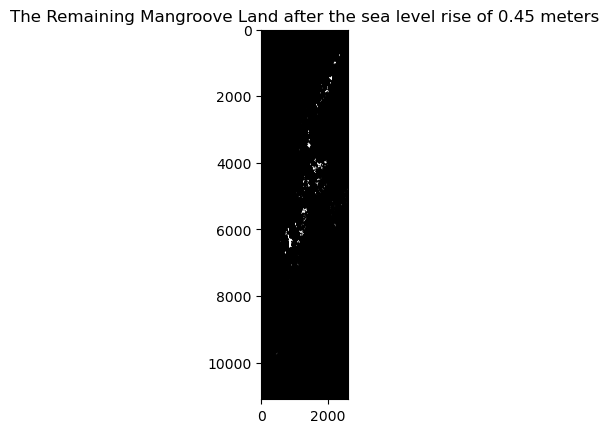

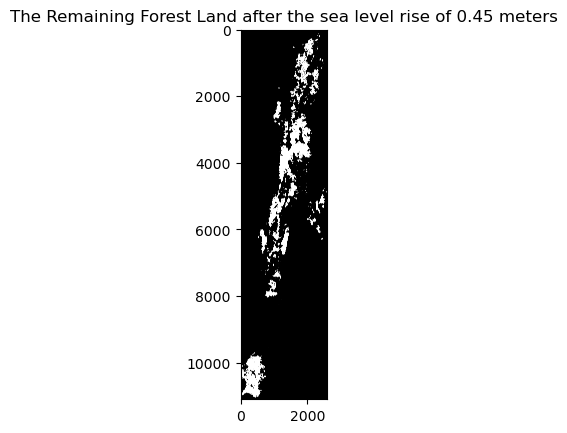

[38.63477986835156, 72.04023131348279, 3.43417404364088, 35.892309975469445, 3.251062347473533]
The Sea Level Rise of 0.9 meters in the Year 2100 will result in the following losses:


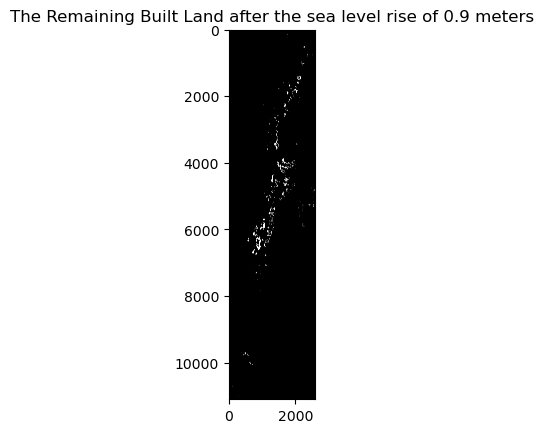

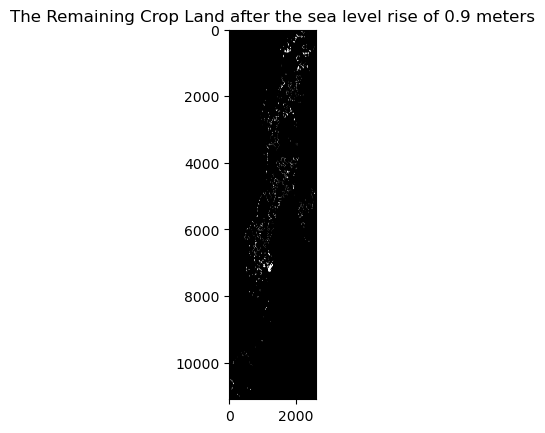

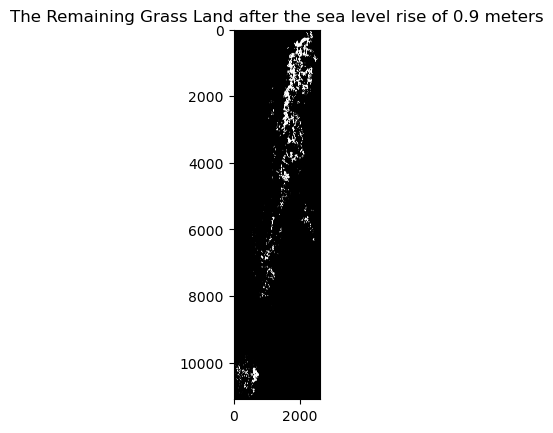

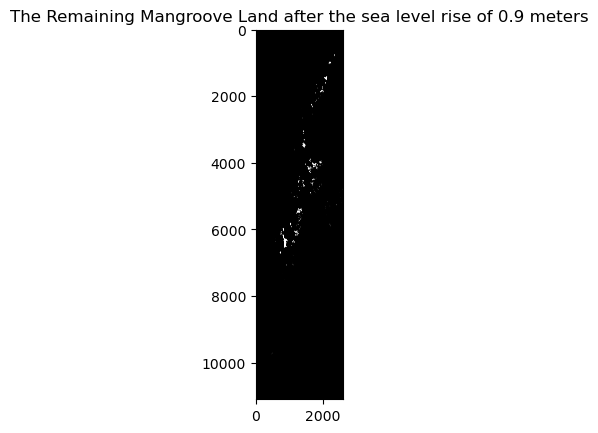

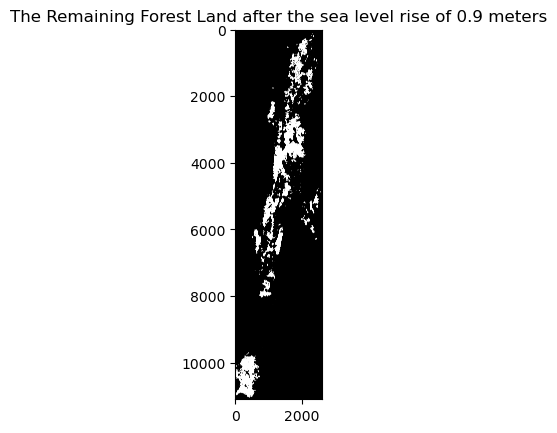

[40.99988015819119, 73.14248682245899, 4.384034687423282, 37.869158715332034, 3.408355003944085]
The Sea Level Rise of 1.5 meters in the Year 2150 will result in the following losses:


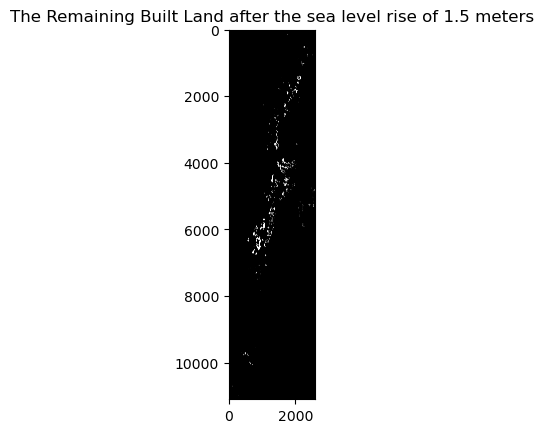

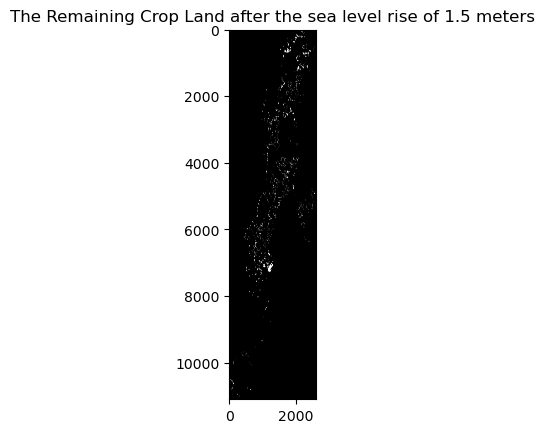

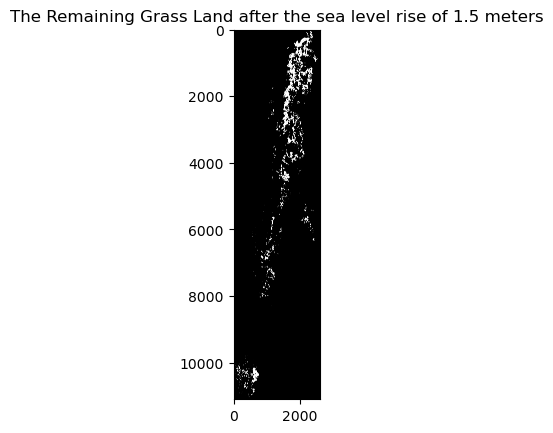

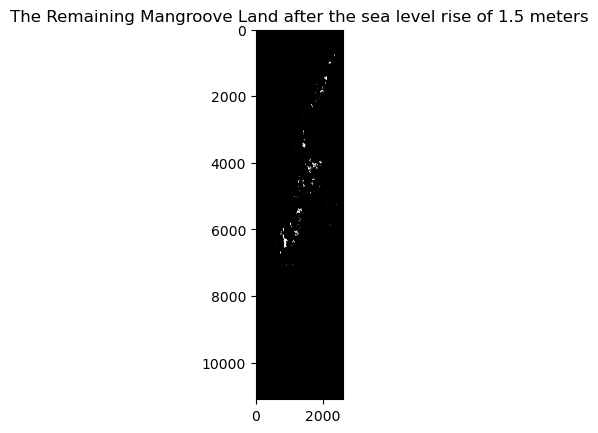

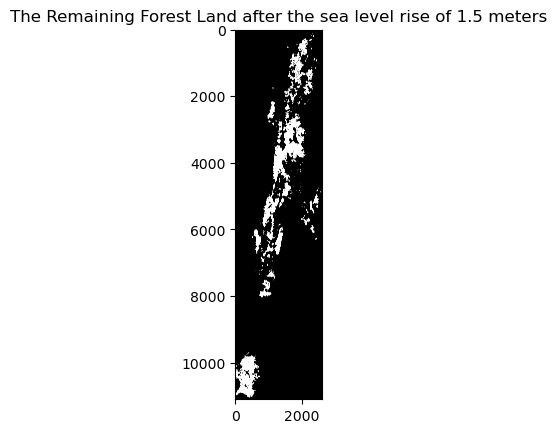

[40.99988015819119, 73.14248682245899, 4.384034687423282, 37.869158715332034, 3.408355003944085]
The Sea Level Rise of 2.1 meters in the Year 2200 will result in the following losses:


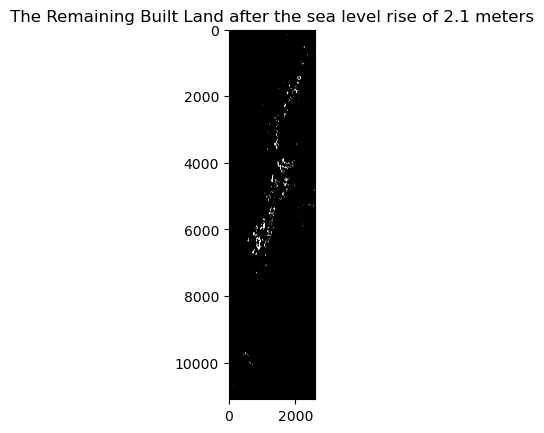

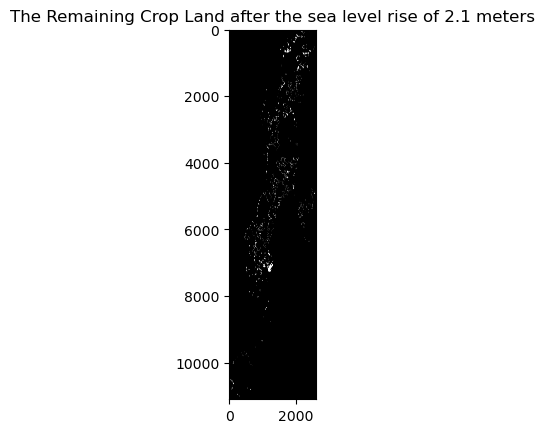

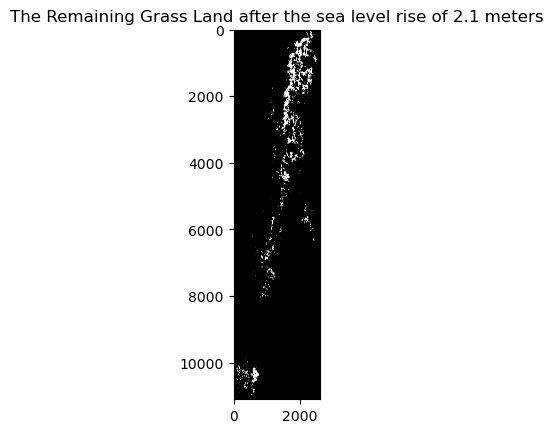

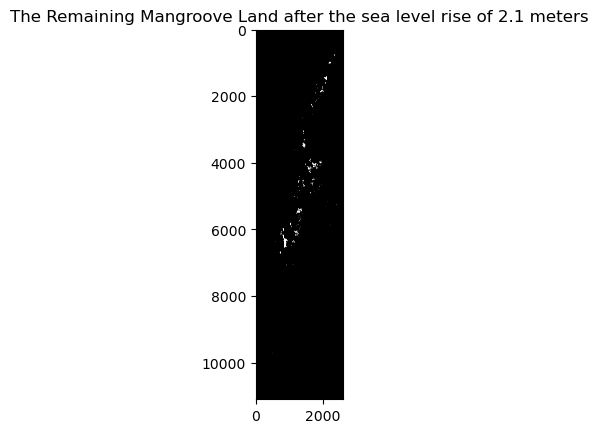

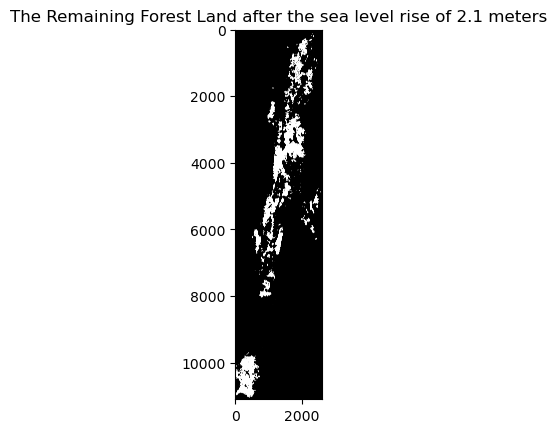

[43.46573633914344, 74.32215980955853, 5.454568428957211, 40.085202224336754, 3.5883774243680557]
The Sea Level Rise of 2.9 meters in the Year 2250 will result in the following losses:


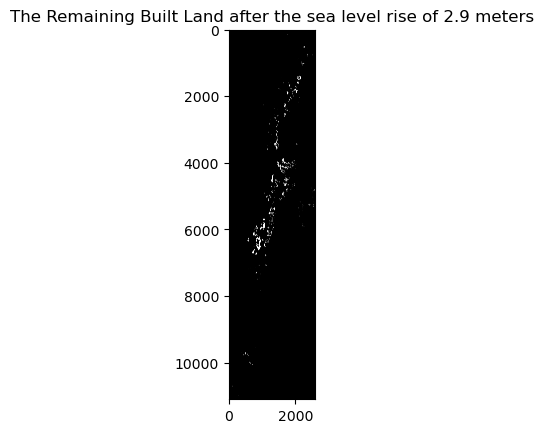

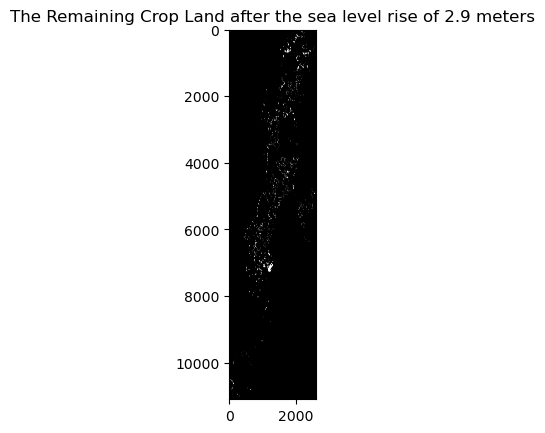

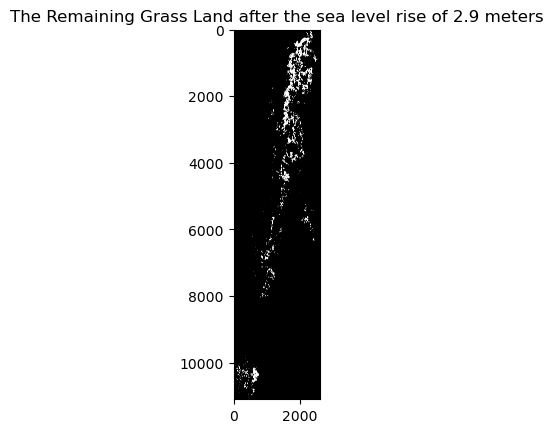

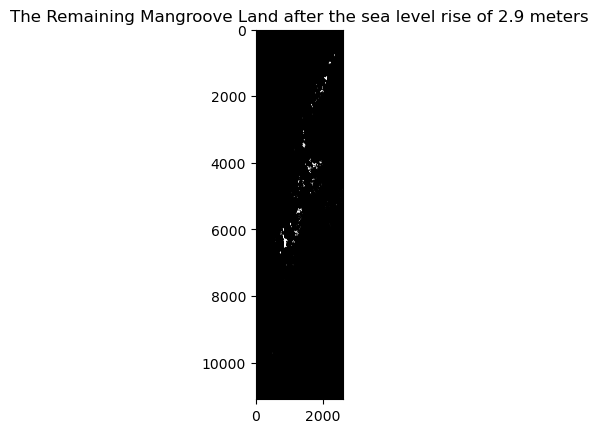

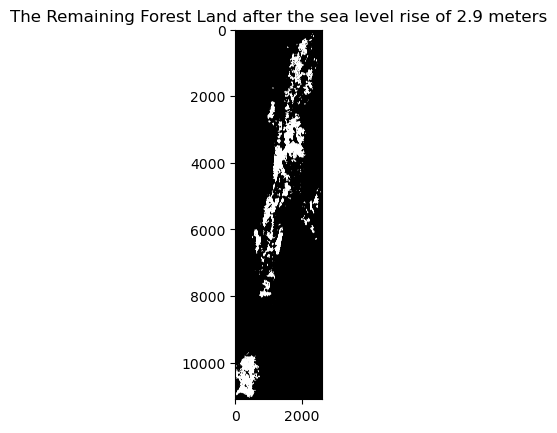

[46.021473876704974, 75.51803431407747, 6.633500368247, 42.64301490165952, 3.786556756825822]
The Sea Level Rise of 3.75 meters in the Year 2300 will result in the following losses:


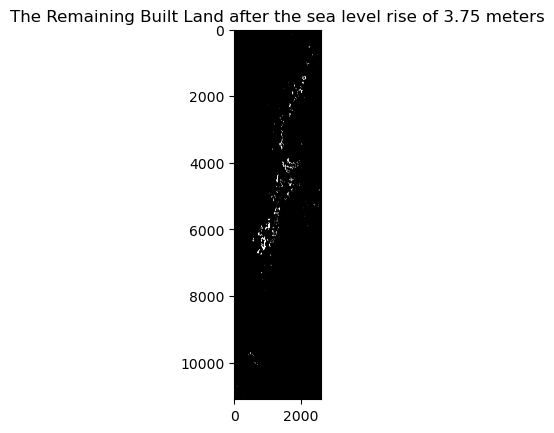

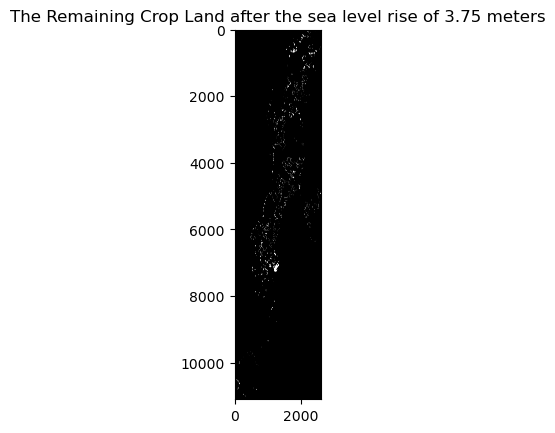

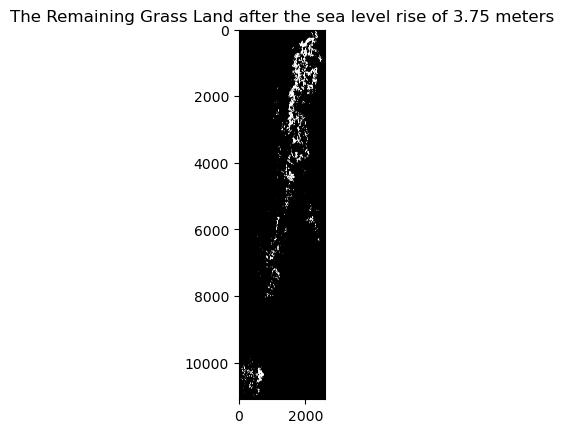

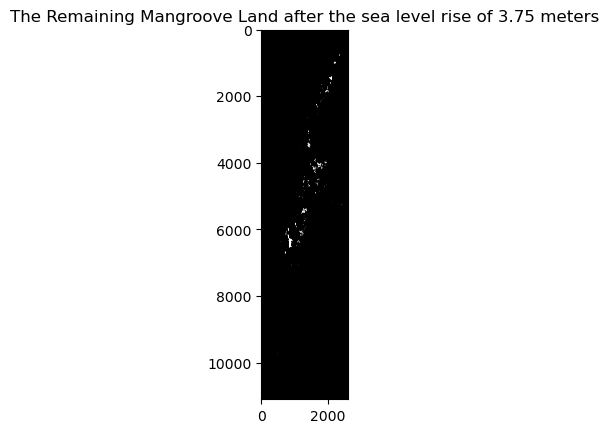

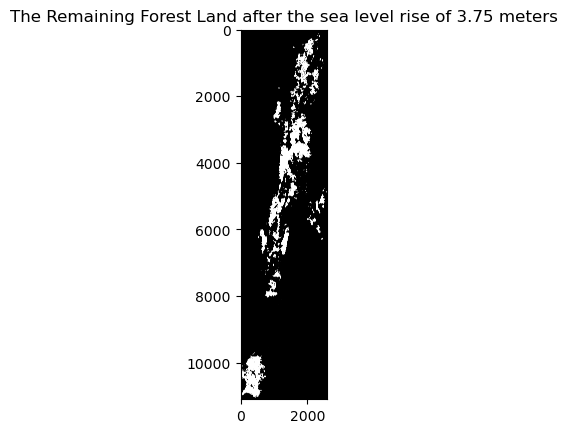

[48.69350235466962, 76.72679638927092, 7.857289846491544, 45.614617070125966, 4.0052802990107175]


In [25]:
RCP85levelsdict = {2050:0.45, 2100:0.9, 2150:1.5, 2200:2.1, 2250:2.9, 2300:3.75}
RCP85dict = {}

for key in RCP85levelsdict:
    print("The Sea Level Rise of "+str(RCP85levelsdict[key])+" meters", "in the Year", str(key), "will result in the following losses:")
    retarr = givereport(RCP85levelsdict[key], key, 'RCP85')
    RCP85dict[key] = retarr

In [26]:
# Write to file RCP85dict

with open('RCP85dict.txt', 'w') as f:
    print(RCP85dict, file=f)
    

In [34]:
import plotly.graph_objects as go
import PIL
import numpy as np

img = np.array(PIL.Image.open('Elevation_2050_RCP26.png'))
img.shape

(11100, 2600)

In [ ]:
z = z_data.transpose()
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
xv, yv = np.meshgrid(x, y)
fig = go.Figure(data=[go.Surface(z=z[::10], x=xv[::10], y=yv[::10])])
fig.update_layout(title='Sea Level Impact on Andaman', height=50)
fig.show()

In [35]:
plotly --version

NameError: name 'plotly' is not defined